In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Get the filename of the CSV containing the Iris dataset from the user
csv_filename = input("Enter the filename of the Iris dataset CSV: ")


In [2]:
# Load the Iris dataset from the provided CSV file
iris_data = pd.read_csv(csv_filename)
X = iris_data.iloc[:, 1:5].values
y = iris_data.iloc[:, -1].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train a Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Calculate and print the accuracy of the model (cross-validated)
accuracy = np.mean(cross_val_score(decision_tree, X_train, y_train, cv=5))
print("Condition 1: Cross-validated Accuracy:", accuracy)


Condition 1: Cross-validated Accuracy: 0.9416666666666668


In [4]:
# Train a Decision Tree classifier with depth limit
depth_limit = 3
decision_tree_depth = DecisionTreeClassifier(max_depth=depth_limit, random_state=42)
decision_tree_depth.fit(X_train, y_train)

# Calculate and print the accuracy of the model
accuracy_depth = np.mean(cross_val_score(decision_tree_depth, X_train, y_train, cv=5))
print("Condition 2: Cross-validated Accuracy (Depth Limit):", accuracy_depth)


Condition 2: Cross-validated Accuracy (Depth Limit): 0.9333333333333333


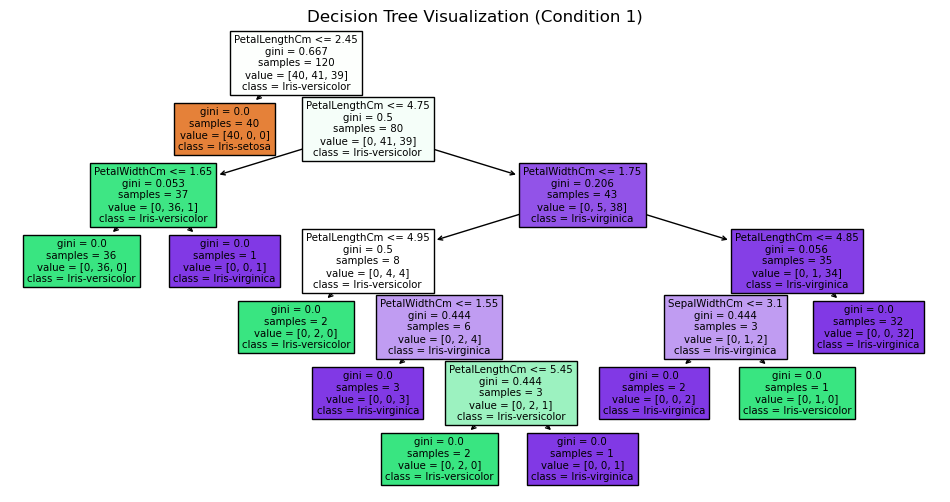

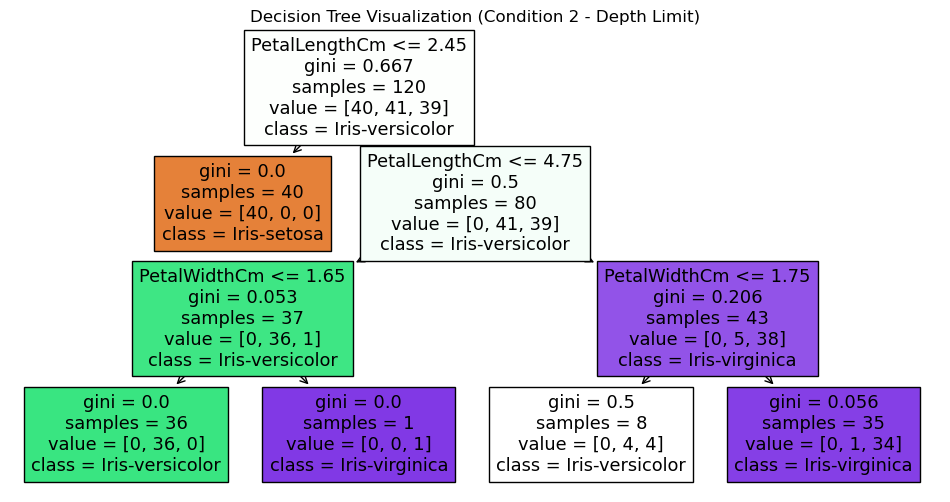

In [5]:
# Visualize the Decision Tree for Condition 1
plt.figure(figsize=(12, 6))
plot_tree(decision_tree, feature_names=iris_data.columns[1:5], class_names=np.unique(y_train), filled=True)
plt.title('Decision Tree Visualization (Condition 1)')
plt.show()

# Visualize the Decision Tree for Condition 2 (with Depth Limit)
plt.figure(figsize=(12, 6))
plot_tree(decision_tree_depth, feature_names=iris_data.columns[1:5], class_names=np.unique(y_train), filled=True)
plt.title('Decision Tree Visualization (Condition 2 - Depth Limit)')
plt.show()
